<a href="https://colab.research.google.com/github/adityachoudharyclg/pytorchBasics/blob/master/feedforward_neural_network_practice1_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torch.utils.data import DataLoader,random_split,TensorDataset
import numpy as np 
from torchvision.transforms import ToTensor

In [0]:
from torchvision.datasets import FashionMNIST

Downloading train and test dataset

In [0]:
train_dataset=FashionMNIST(root='data/',train=True,download=True,transform=ToTensor())

In [4]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

9


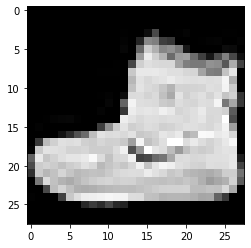

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0].reshape(28,28),cmap='gray')
print(train_dataset[0][1])

In [6]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [0]:
test_dataset=FashionMNIST(root='data/',train=False,download=True,transform=ToTensor())

In [8]:
len(test_dataset)

10000

2


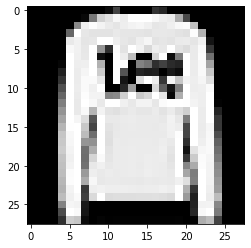

In [9]:
plt.imshow(test_dataset[1][0].reshape(28,28),cmap='gray')
print(test_dataset[1][1])

Preprocessing Data

In [0]:
train_ds,val_ds=random_split(train_dataset,[int(len(train_dataset)*0.8),int(len(train_dataset)*0.2)])

In [11]:
train_ds[0][0].shape

torch.Size([1, 28, 28])

In [0]:
train_dl=DataLoader(train_ds,batch_size=256,shuffle=True)
val_dl=DataLoader(val_ds,batch_size=256,shuffle=True)

In [13]:
for xb,yb in train_dl:
    print(xb.shape)
    print(yb)
    break

torch.Size([256, 1, 28, 28])
tensor([8, 2, 9, 6, 6, 7, 7, 9, 3, 8, 8, 2, 4, 2, 1, 3, 2, 8, 7, 4, 2, 0, 7, 4,
        8, 0, 5, 6, 4, 5, 3, 4, 6, 9, 7, 5, 6, 2, 5, 0, 7, 0, 0, 1, 0, 1, 3, 6,
        1, 8, 2, 0, 1, 4, 7, 2, 5, 9, 8, 6, 3, 4, 3, 3, 6, 6, 8, 5, 1, 7, 9, 6,
        1, 1, 7, 5, 1, 0, 6, 2, 2, 5, 3, 9, 2, 4, 4, 9, 7, 8, 9, 6, 0, 6, 1, 5,
        4, 8, 3, 0, 6, 0, 2, 6, 2, 2, 1, 0, 4, 8, 8, 3, 5, 3, 7, 0, 5, 9, 4, 9,
        1, 8, 4, 2, 4, 5, 2, 1, 9, 5, 0, 6, 2, 5, 2, 4, 2, 0, 1, 4, 7, 8, 2, 5,
        8, 0, 9, 1, 6, 5, 1, 6, 6, 4, 4, 7, 5, 3, 9, 4, 2, 5, 7, 0, 3, 4, 1, 0,
        8, 2, 3, 0, 8, 0, 6, 1, 6, 8, 4, 3, 2, 7, 5, 7, 4, 9, 6, 9, 0, 1, 1, 0,
        7, 5, 0, 4, 3, 3, 7, 4, 8, 1, 5, 0, 7, 1, 6, 2, 3, 0, 5, 3, 1, 4, 0, 1,
        9, 4, 4, 6, 0, 0, 5, 4, 1, 6, 1, 8, 5, 0, 6, 1, 6, 2, 2, 4, 1, 6, 3, 9,
        8, 1, 3, 2, 0, 8, 4, 8, 0, 5, 9, 8, 8, 6, 9, 6])


Creating Model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class fashionMNIST(nn.Module):
    def __init__(self,input_size=784,output_size=10):
        super().__init__()
        # Hidden Layer 1
        self.linear1=nn.Linear(input_size,128)
        # Hidden Layer 2
        self.linear2=nn.Linear(128,32)
        # output Layer
        self.linear3=nn.Linear(32,output_size)
    
    def forward(self,xb):
        xb=xb.view(xb.size(0),-1)
        out=self.linear1(xb)
        out=F.relu(out)
        out=self.linear2(out)
        out=F.relu(out)
        out=self.linear3(out)
        return out
    
    def fit(self,train_dl,val_dl,metric=None,lr=0.01,num_epochs=10):
        opt=torch.optim.SGD
        optimizer=opt(self.parameters(),lr)
        for epoch in range(num_epochs):
            # Training phase
            # print(train_dl)
            for batch,labels in train_dl:
                # print(batch)
                outputs=self(batch)
                loss=F.cross_entropy(outputs,labels)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            # validation phase
            avg_loss=[]
            avg_acc=[]
            total=0
            for batch,labels in val_dl:
                outputs=self(batch)
                val_loss=F.cross_entropy(outputs,labels)
                avg_loss.append(len(batch)*val_loss)
                if(metric!=None):
                    avg_acc.append(len(batch)*metric(outputs,labels))
                total+=len(batch)
            avg_loss=sum(avg_loss)/total
            if(metric!=None):
                avg_acc=sum(avg_acc)/total
            if metric==None:
                print('Epoch [{}/{}] cur_train_loss:{:.4f} avg_val_loss:{:.4f}'.format(epoch+1,num_epochs,loss,avg_loss))
            else:
                print('Epoch [{}/{}] cur_train_loss:{:.4f} avg_val_loss:{:.4f} avg_val_acc={:.4f}'.format(epoch+1,num_epochs,loss,avg_loss,avg_acc))

In [16]:
model=fashionMNIST()
for xb,yb in train_dl:
    preds=model(xb)
    print(preds.shape)
    break

torch.Size([256, 10])


Metrics

In [0]:
def accuracy(outputs,labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

Loading data to GPU

In [0]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
class DeviceDataLoader():
    # Convenient for moving data to device
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b,self.device)
    
    def __len__(self):
        """ Number of batches """
        return len(self.dl)

Testing the model

In [0]:
device=get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [29]:
model=fashionMNIST()
to_device(model, device)

fashionMNIST(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=10, bias=True)
)

In [30]:
for item in model.parameters():
    print(item.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([32, 128])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [31]:
model.fit(train_dl,val_dl,metric=accuracy,lr=0.05)

Epoch [1/10] cur_train_loss:0.9216 avg_val_loss:0.8611 avg_val_acc=0.6865
Epoch [2/10] cur_train_loss:0.5630 avg_val_loss:0.6840 avg_val_acc=0.7672
Epoch [3/10] cur_train_loss:0.5847 avg_val_loss:0.6140 avg_val_acc=0.7862
Epoch [4/10] cur_train_loss:0.6238 avg_val_loss:0.5383 avg_val_acc=0.8147
Epoch [5/10] cur_train_loss:0.5720 avg_val_loss:0.5071 avg_val_acc=0.8253
Epoch [6/10] cur_train_loss:0.5301 avg_val_loss:0.5241 avg_val_acc=0.8153
Epoch [7/10] cur_train_loss:0.4402 avg_val_loss:0.4759 avg_val_acc=0.8345
Epoch [8/10] cur_train_loss:0.4619 avg_val_loss:0.4639 avg_val_acc=0.8370
Epoch [9/10] cur_train_loss:0.3845 avg_val_loss:0.4484 avg_val_acc=0.8448
Epoch [10/10] cur_train_loss:0.5725 avg_val_loss:0.5228 avg_val_acc=0.8165


In [0]:
test_dl=DataLoader(test_dataset,batch_size=1024,shuffle=True)
device=get_default_device()
test_dl = DeviceDataLoader(test_dl, device)

In [33]:
for xb,yb in test_dl:
    outputs=model(xb)
    print(accuracy(outputs,yb))

0.8046875
0.7939453125
0.8330078125
0.8056640625
0.802734375
0.7880859375
0.8037109375
0.8046875
0.8349609375
0.8125


Saving the model

In [0]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

Loading the model

In [35]:
model2 = fashionMNIST()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.0014, -0.0119, -0.0223,  ..., -0.0342,  0.0340, -0.0053],
                      [-0.0010, -0.0278, -0.0080,  ...,  0.0182,  0.0149,  0.0120],
                      [ 0.0062,  0.0084, -0.0236,  ..., -0.0352, -0.0342, -0.0133],
                      ...,
                      [ 0.0309,  0.0262,  0.0258,  ...,  0.0076, -0.0253, -0.0218],
                      [-0.0266,  0.0225, -0.0323,  ..., -0.0350,  0.0251,  0.0309],
                      [ 0.0290,  0.0341,  0.0170,  ...,  0.0096, -0.0258,  0.0008]])),
             ('linear1.bias',
              tensor([-1.2102e-01, -4.8212e-03,  6.6215e-03, -3.0770e-02,  1.1165e-01,
                       2.2034e-02,  2.4774e-02,  3.5050e-03,  4.8363e-02,  5.1133e-02,
                      -1.0931e-01, -8.4821e-03,  7.6143e-02,  5.2769e-02,  1.7194e-02,
                      -1.7293e-02,  9.7423e-03, -8.0105e-03,  7.2275e-03,  1.0236e-01,
                      -5.9603e-03,  7.5873e-02,  3.7971e